In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 因果フォレストのDMLをインポート
from econml.dml import CausalForestDML
# 線形回帰のインポート
from sklearn.linear_model import LinearRegression 
# ロジスティック回帰のインポート
from sklearn.linear_model import LogisticRegression
# 非パラメトリック回帰のインポート
from statsmodels.nonparametric.kernel_regression import KernelReg

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [3]:
df = pd.read_csv('./data/cf_sampledata_1.csv')

- Casual Forest DMLで使用する4つの変数
    - Y (Outcome)
        - 目的変数
        - 因果関係の知りたい介入の結果の変数
            - 因果関係の「果」の部分
            - 薬の投与後の患者の回復率
            - 広告キャンペーン後の売上
    - T (Treatment)
        - 介入・処置変数
        - 2つの状態、連続的な介入の度合いを示す変数
            - 因果関係の「因」の部分    
            - 介入されたか/されなかったか
            - 薬の投与量
            - 広告の予算
    - X (共変量)
        - トリートメント効果（推定したい因果）の異質性を理解するために使用される変数
            - ユーザーの年齢
            - 地域
            - 性別
        - これらの変数い基づいて、条件付きのトリートメント効果（CATE：Conditional Average Treatment Effect）を推定する
    - W (制御変数)
        - アウトカムYとトリートメントTの関係をモデル化する際に、他の潜在的な影響要因を制御するために使用される変数
        - Tには影響ないけど、Yに関連のある変数があたる

In [5]:
# 変数設定
Y_col = "House_Price"
T_col = "Is_Park_Opened"
X_list = ["Distance_to_Park"]
W_list = ["House_Area", "Year_Built", "Average_Income"]


# データ設定
Y = df[Y_col]
T = df[T_col]
X = df[X_list]
W = df[W_list]

In [7]:
# CausalForestDMLインスタンス生成と学習
# アウトカムYのモデルとして線形回帰を使用します
# トリートメントTのモデルとして、ロジスティック回帰を使用
# トリートメントTが離散的（例: バイナリやカテゴリ変数）であることを示すフラグ
model = CausalForestDML(model_y=LinearRegression(),
                        model_t=LogisticRegression(),
                        discrete_treatment=True)
model.fit(Y, T, X=X, W=W)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [8]:
# 距離ごとの因果効果の推定
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
treatment_effects = model.effect(X_test)

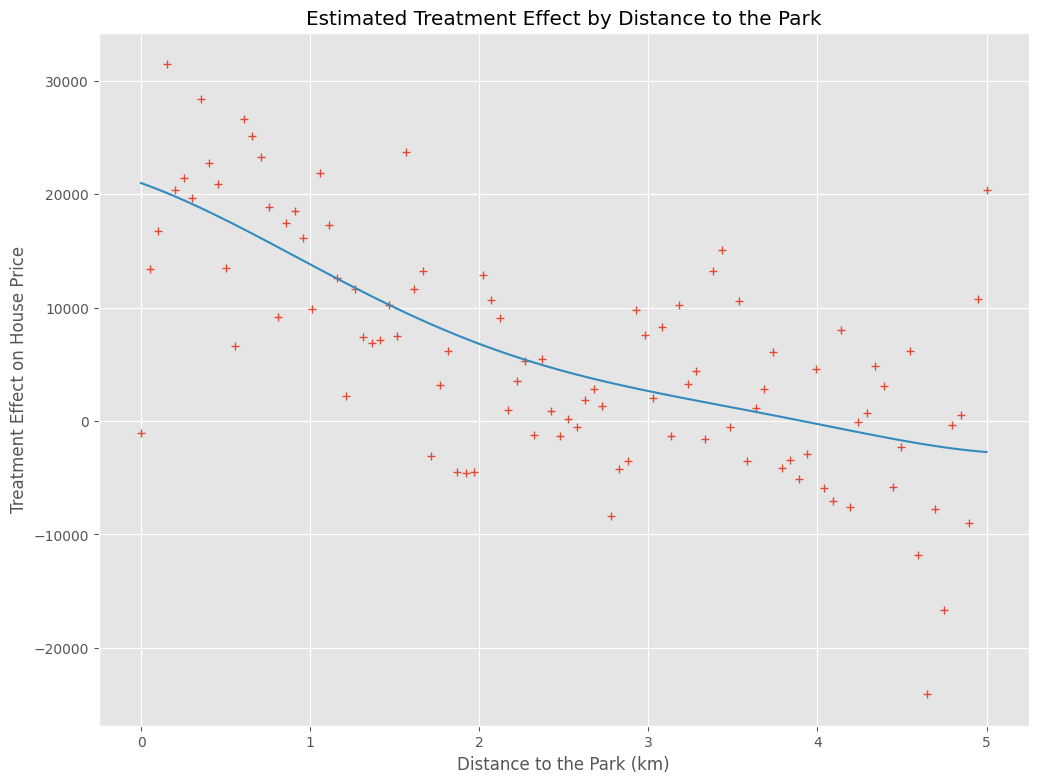

In [10]:
# 結果のプロット
# カーネル回帰でE[Y|X]を算出
kr = KernelReg(treatment_effects, X_test, 'c',bw=[1])
y_pred, _ = kr.fit(X_test)

# グラフ化
plt.plot(X_test, treatment_effects,'+')
plt.plot(X_test, y_pred)
plt.xlabel("Distance to the Park (km)")
plt.ylabel("Treatment Effect on House Price")
plt.title("Estimated Treatment Effect by Distance to the Park")
plt.grid(True)
plt.show()